## Space Base Challenge 2023 | Project AIM Team

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import pandas as pd
import numpy as np
import matplotlib.patheffects

df = pd.read_csv('E:\Temporal Signature.csv')
df.head()

,Date,JUN_Rice,JUL_Rice,AUG_Rice,SEP_Rice,OCT_Rice,Urban,Water,non-rice
0,June-1_FN,172.671,199.246,194.006,205.601,204.608,232.737,69.394,205.620
1,June_2FN,97.142,184.878,203.635,194.607,198.209,230.372,66.009,200.391
2,July_1FN,118.467,190.915,192.909,187.545,195.271,231.916,68.759,201.967
3,July_2FN,150.606,115.703,116.736,185.466,195.670,231.882,65.468,206.904
4,Aug_1FN,173.495,138.085,158.467,102.370,200.035,229.989,69.943,205.781


In [5]:
# Create new column names
col = {
    'JUN_Rice': '1_Rice',
    'JUL_Rice': '2_Rice',
    'AUG_Rice': '3_Rice',
    'SEP_Rice': '4_Rice',
    'OCT_Rice': '5_Rice',
}

# Now rename the columns
df = df.rename(columns=col)

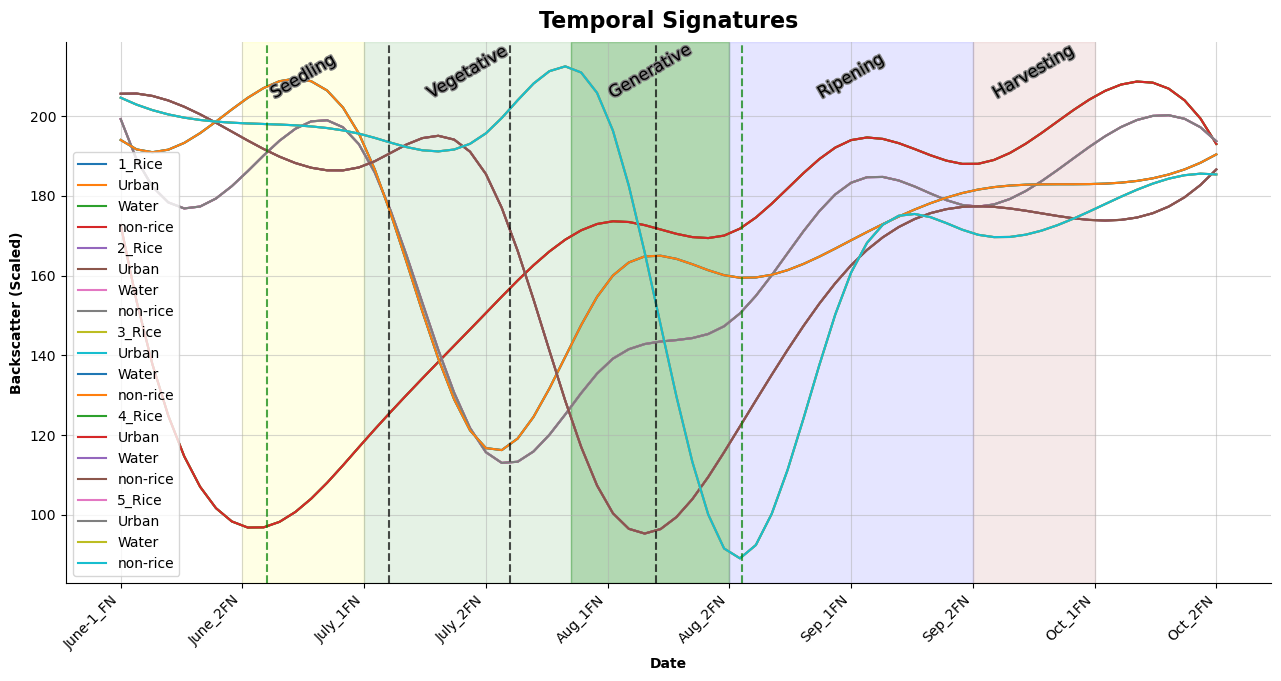

In [23]:
# Create the scatter plot with connection lines and grid
fig, ax = plt.subplots(figsize=(14,8)) # Adjust the size as needed
sns.despine()

ax.set_title("Temporal Signatures", size=16, pad=10, weight='bold')

# Smooth curve for each rice column using spline
for month in ['1', '2', '3', '4', '5']:
    column_name = f'{month}_Rice'
    x = np.arange(len(df['Date']))
    y = df[column_name]
    spl = make_interp_spline(x, y, k=3)
    x_smooth = np.linspace(x.min(), x.max(), 70)
    y_smooth = spl(x_smooth)
    plt.plot(x_smooth, y_smooth, label=f'{column_name}', linewidth=1.5)
    
#Plot Urban, water and non-rice variables
    for column_name in ['Urban', 'Water','non-rice']:
        t = np.arange(len(df['Date']))
        z = df[column_name]
        spl =make_interp_spline(x, y, k=3)
        t_smooth = np.linspace(x.min(), x.max(), 70)
        z_smooth = spl(x_smooth)
        plt.plot(t_smooth, z_smooth, label=f'{column_name}', linewidth=1.5)
        plt.legend()
# Move the legend inside the plot, control its size and position
#plt.legend(loc='upper left', bbox_to_anchor=(0.93, 0.99), fontsize='8')

ax.grid(True, alpha=0.5)  
ax.set_ylabel('Backscatter (Scaled)', fontsize='10', weight='bold')
ax.set_xlabel('Date', fontsize='10',  weight='bold')
ax.set_xticks(np.arange(len(df['Date'])))
ax.set_xticklabels(df['Date'], rotation=45, ha='right')  

#Highlight Background
plt.axvspan(5, 7, color='blue', alpha=0.1)
plt.axvspan(1, 2, color='yellow', alpha=0.1)
plt.axvspan(7, 8, color='brown', alpha=0.1)
plt.axvspan(2, 3.7, color='green', alpha=0.1)
plt.axvspan(3.7, 5, color='green', alpha=0.3)

# Broken Lines
plt.axvline(x=5.1, color='g', alpha=0.7, linestyle='--')
plt.axvline(x=4.4, color='k', alpha=0.7, linestyle='--')
plt.axvline(x=1.2, color='g', alpha=0.7, linestyle='--')
plt.axvline(x=2.2, color='k', alpha=0.7, linestyle='--')
plt.axvline(x=3.2, color='k', alpha=0.7, linestyle='--')

# Transplanting Labels
transplanting_label_x = np.mean([5, 7])
transplanting_label_y = ax.get_ylim()[0] + 0.89 * (ax.get_ylim()[1] - ax.get_ylim()[0])  # Adjust the y-coordinate as needed
plt.text(transplanting_label_x, transplanting_label_y, 'Ripening',color='k', ha='center', va='bottom', rotation=30, fontsize='12',
          path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='gray')])

transplanting_label_x = np.mean([7, 8])
transplanting_label_y = ax.get_ylim()[0] + 0.89 * (ax.get_ylim()[1] - ax.get_ylim()[0])
plt.text(transplanting_label_x, transplanting_label_y, 'Harvesting', color='k',ha='center', va='bottom', rotation=30, fontsize='12',
          path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='gray')])

transplanting_label_x = np.mean([3.7, 5])
transplanting_label_y = ax.get_ylim()[0] + 0.89 * (ax.get_ylim()[1] - ax.get_ylim()[0])
plt.text(transplanting_label_x, transplanting_label_y, 'Generative', color='k',ha='center', va='bottom', rotation=30, fontsize='12',
          path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='gray')])


transplanting_label_x = np.mean([2, 3.7])
transplanting_label_y = ax.get_ylim()[0] + 0.89 * (ax.get_ylim()[1] - ax.get_ylim()[0])
plt.text(transplanting_label_x, transplanting_label_y, 'Vegetative', color='k',ha='center', va='bottom', rotation=30, fontsize='12',
    path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='gray')])

transplanting_label_x = np.mean([1, 2])
transplanting_label_y = ax.get_ylim()[0] + 0.89 * (ax.get_ylim()[1] - ax.get_ylim()[0])
plt.text(transplanting_label_x, transplanting_label_y, 'Seedling', color='k',ha='center', va='bottom', rotation=30, fontsize='12',
    path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='gray')]) #bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgray', linewidth=2, alpha=0.7),

plt.tight_layout(pad=5)
plt.show()